In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('C:/mini project/Telecom customer churn prediction/telecom_customer_churn.csv')

In [3]:
data.head()


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
data.shape


(7043, 38)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

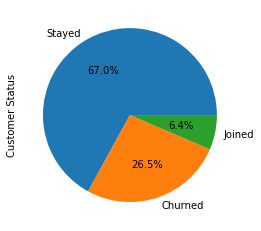

In [6]:
data['Customer Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.show()

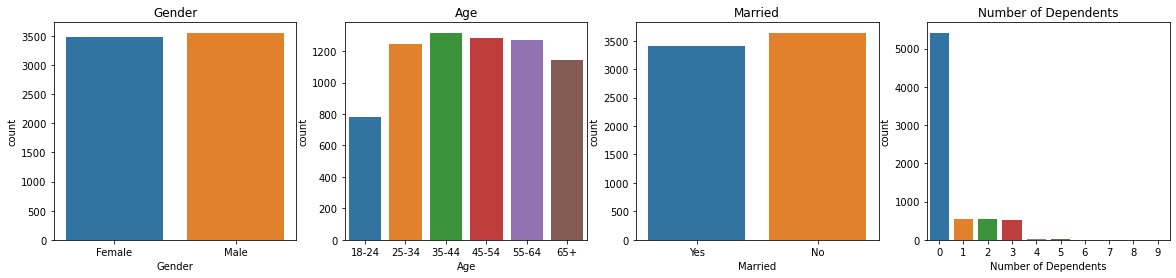

In [10]:
demo_col = ['Gender','Age','Married','Number of Dependents']
numerical = demo_col

plt.figure(figsize=(20,4))

for i, cols1 in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(cols1), data=data)
    ax.set_title(f"{cols1}")

In [11]:
churned = data[data['Customer Status'] != 'Joined']


<AxesSubplot:xlabel='Monthly Charge', ylabel='Customer Status'>

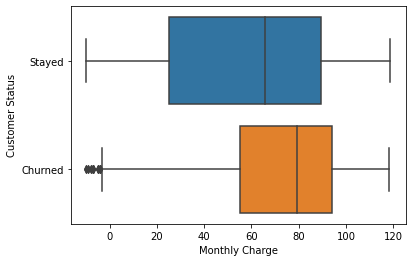

In [12]:
sns.boxplot(x='Monthly Charge', y='Customer Status', data=churned)


In [14]:
medians = churned.groupby(['Customer Status'])['Monthly Charge'].median().values
mins = churned.groupby(['Customer Status'])['Monthly Charge'].min().values
maxes = churned.groupby(['Customer Status'])['Monthly Charge'].max().values

print(medians, mins, maxes)

[79.5 65.6] [-10. -10.] [118.35 118.75]


In [15]:
churned['Customer Status'].value_counts()


Stayed     4720
Churned    1869
Name: Customer Status, dtype: int64

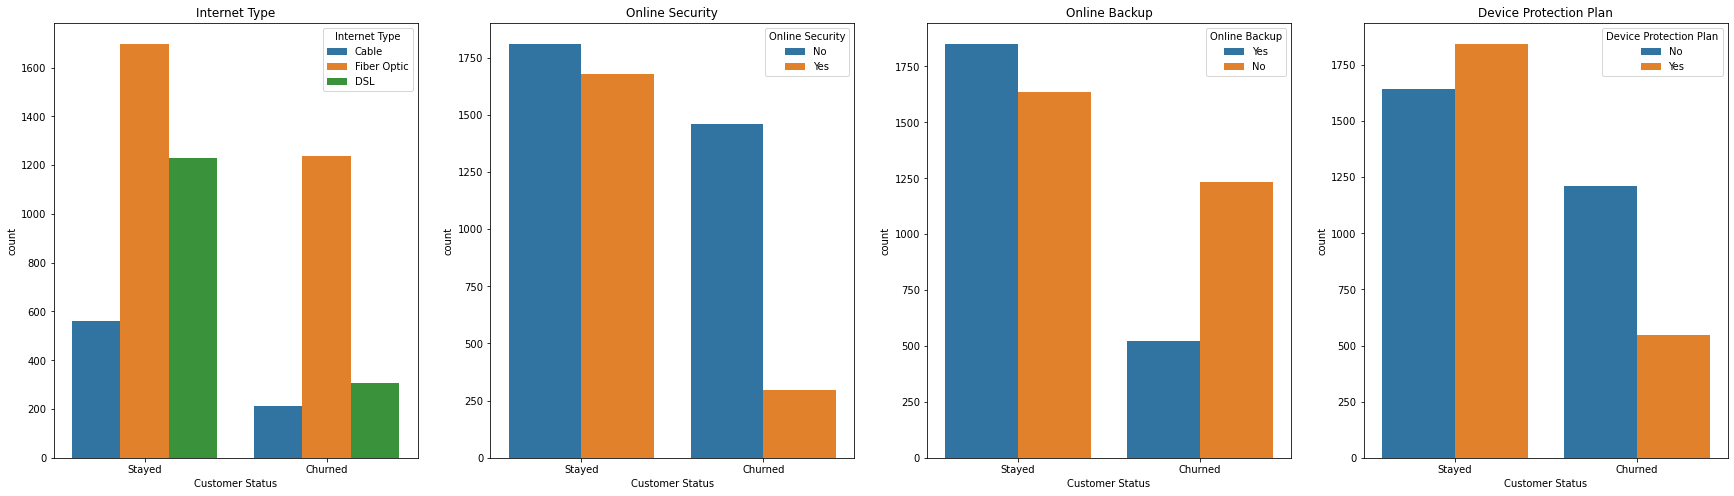

In [16]:
cat_cols = ['Internet Type','Online Security','Online Backup', 'Device Protection Plan']

plt.figure(figsize=(30,8))

for i, col in enumerate(cat_cols):
    ax = plt.subplot(1, len(cat_cols), i+1)
    sns.countplot(x ="Customer Status", hue = str(col), data = churned)
    ax.set_title(f"{col}")

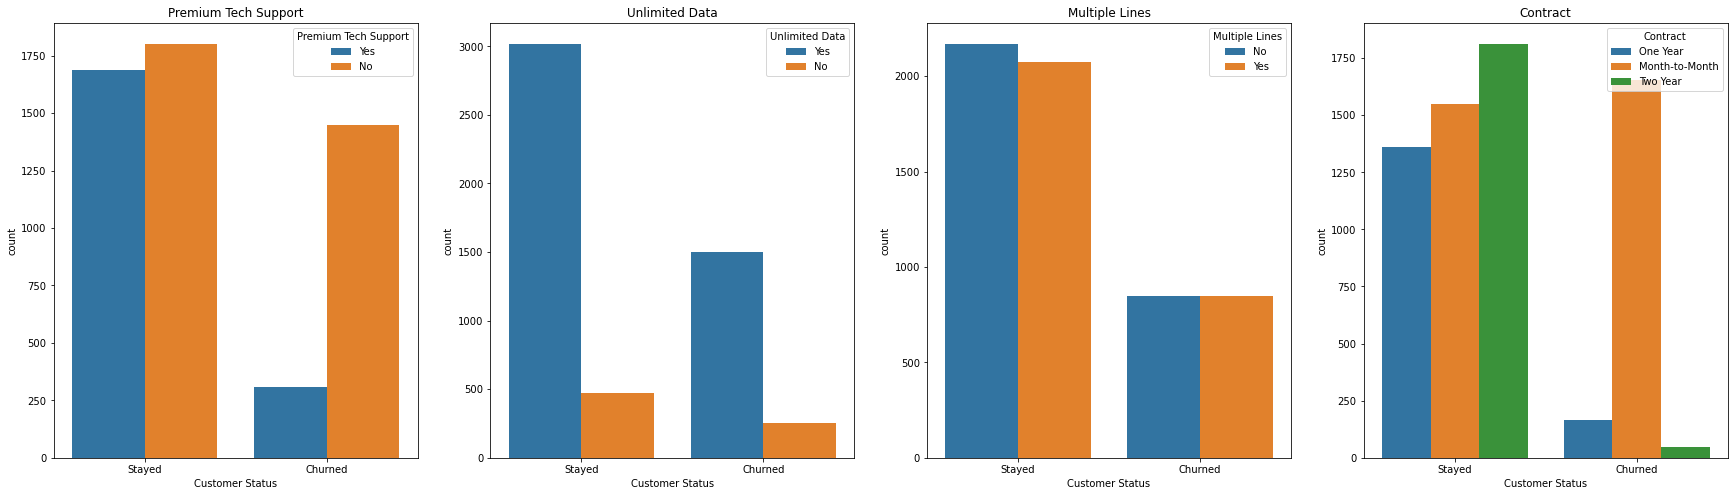

In [17]:
cat_cols_2 = ['Premium Tech Support','Unlimited Data','Multiple Lines','Contract']

plt.figure(figsize=(30,8))

for i, col2 in enumerate(cat_cols_2):
    ax = plt.subplot(1, len(cat_cols_2), i+1)
    sns.countplot(x ="Customer Status", hue = str(col2), data = churned)
    ax.set_title(f"{col2}")

In [18]:
from sklearn.preprocessing import LabelEncoder

num_data = churned.select_dtypes(include=['int64', 'float64'])
cat_data = churned.select_dtypes(include=['object'])


le = LabelEncoder()
cat_data = cat_data.apply(lambda col: le.fit_transform(col))

final_data = pd.concat([num_data, cat_data], axis=1)

In [19]:
final_data.head()


,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Category,Churn Reason
0,0,93225,34.827662,-118.999073,2,9,42.39,16.0,65.6,593.30,...,1,0,0,1,1,1,1,1,5,20
1,0,91206,34.162515,-118.203869,0,9,10.69,10.0,-4.0,542.40,...,0,1,1,0,0,0,1,1,5,20
2,0,92627,33.645672,-117.922613,0,4,33.65,30.0,73.9,280.85,...,0,0,0,1,0,1,0,0,1,2
3,0,94553,38.014457,-122.115432,1,13,27.82,4.0,98.0,1237.85,...,1,1,0,1,0,1,0,0,2,18
4,0,93010,34.227846,-119.079903,3,3,7.38,11.0,83.9,267.40,...,1,0,0,1,0,1,1,0,2,14


In [20]:
final_data['Customer Status'].value_counts()


1    4720
0    1869
Name: Customer Status, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split


final_data= final_data.dropna()
final_data= final_data.drop(columns=['Customer ID'])

X = final_data.drop(columns=['Customer Status','Churn Category', 'Churn Reason'])
y = final_data['Customer Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

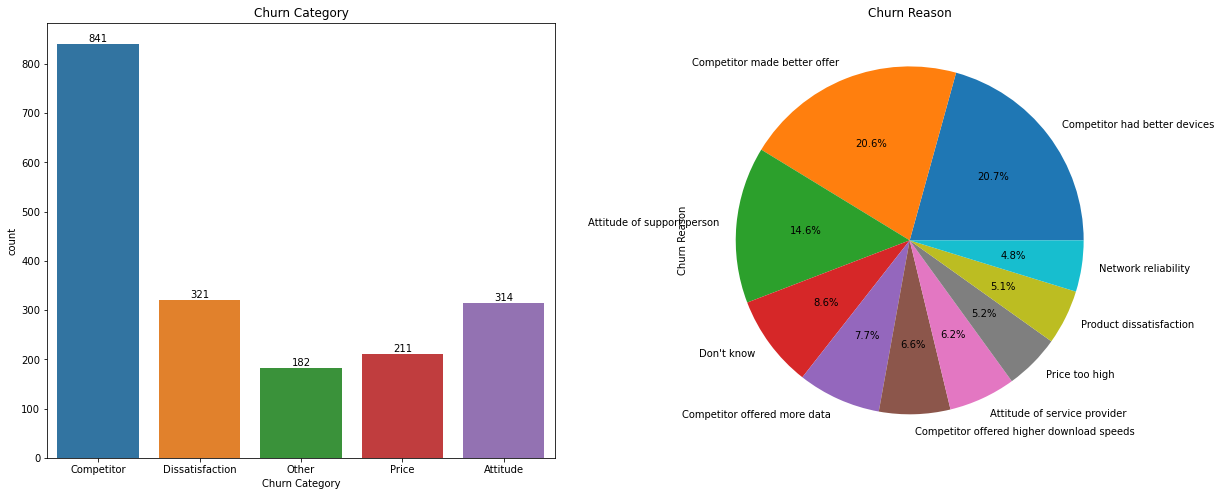

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))


sns.countplot(x='Churn Category', data=churned, ax=ax1)
ax1.set_title("Churn Category")

for patch in ax1.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax1.annotate(f"{y:.0f}", (x, y), ha='center', va='bottom')



churn_counts = churned['Churn Reason'].value_counts()

churn_counts[:10].plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title("Churn Reason")

plt.show()